In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from dotenv import load_dotenv
import os

load_dotenv()
raw_data = os.getenv("RAW_DATA_PATH")

sns.set(style='whitegrid', palette='muted')

In [ ]:
#Carregar o dataset
df_wine = pd.read_csv(raw_data, sep=',')
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [ ]:
# Informações básicas
print("Shape:", df_wine.shape)
df_wine.info()
df_wine.describe().T #Transpose para melhor visualização

Shape: (178, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    f

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [29]:
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

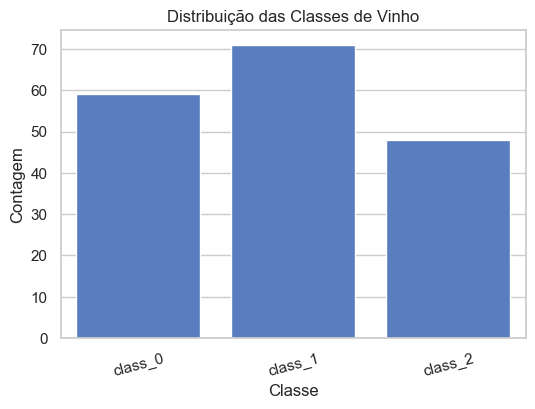

In [ ]:
#Distribuição das classes
plt.figure(figsize=(6,4))
sns.countplot(x='target_name', data=df_wine)
plt.title('Distribuição das Classes de Vinho')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(rotation=15)
plt.show()

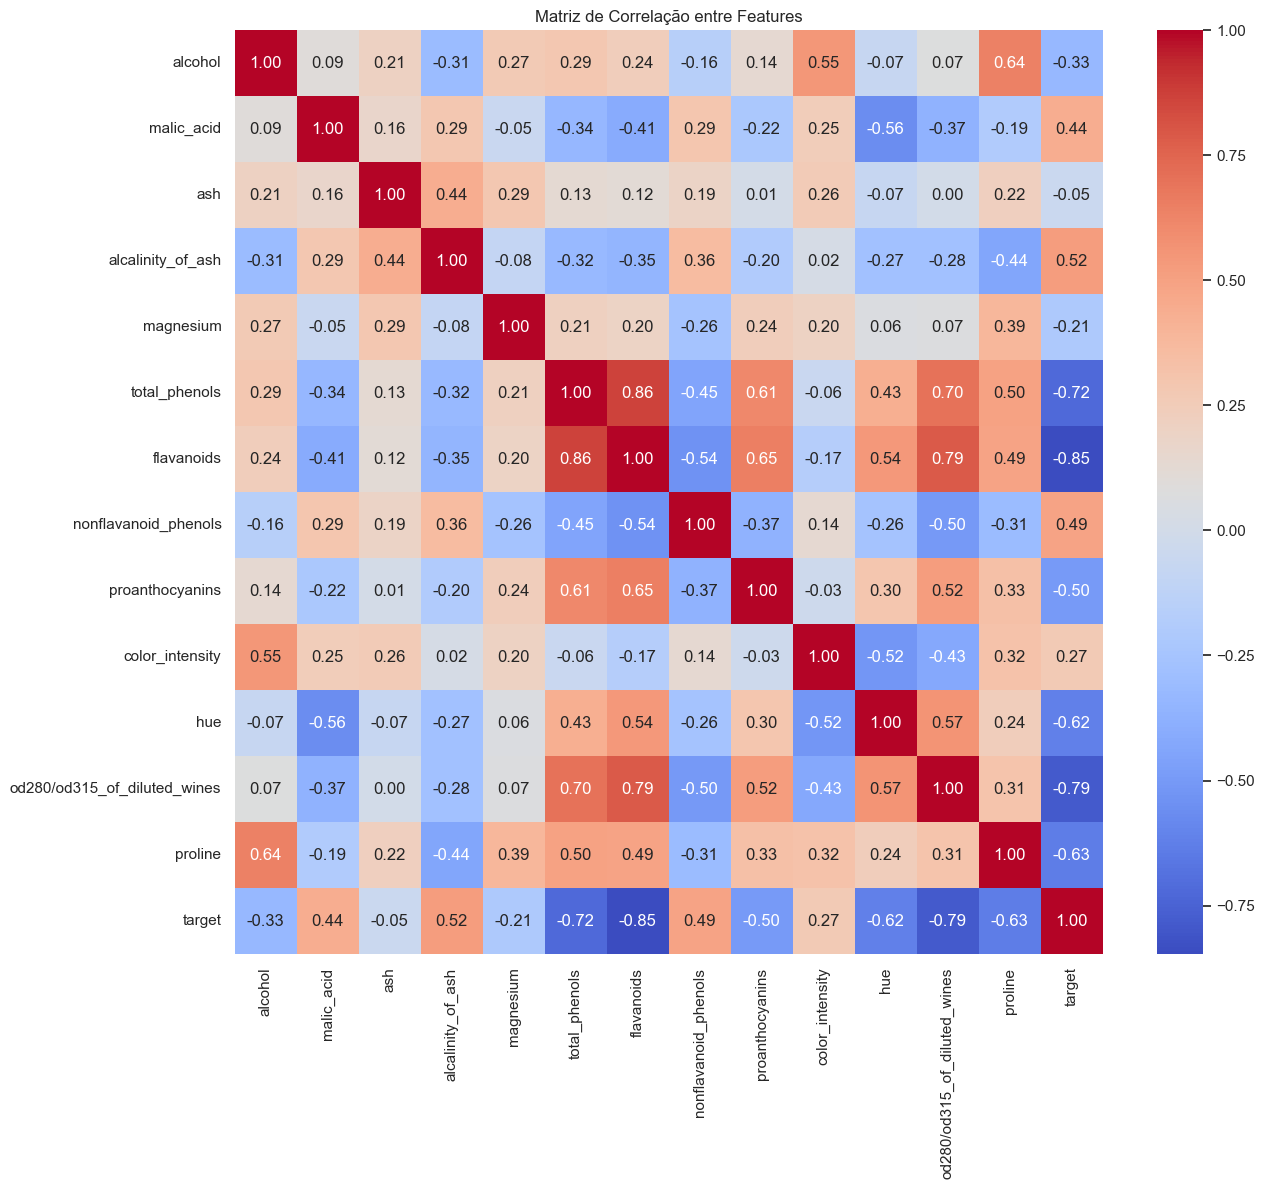

"
#Correlação - target:
# - flavanoids (-0.85), od280/od315 (-0.79), proline (-0.63) e hue (-0.62) são fortemente correlacionadas com a classe do vinho.
# - Essas variáveis são boas candidatas para classificação.

# Correlações - entre features:
# - flavanoids ~ total_phenols (0.86)
# - od280/od315 ~ total_phenols (0.70)
# **** Possível redundância, considerar PCA ou remover



In [20]:
#Matriz de correlação
plt.figure(figsize=(14,12))
sns.heatmap(df_wine.drop(columns='target_name').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação entre Features')
plt.show()

conslusao = """"
#Correlação - target:
# - flavanoids (-0.85), od280/od315 (-0.79), proline (-0.63) e hue (-0.62) são fortemente correlacionadas com a classe do vinho.
# - Essas variáveis são boas candidatas para classificação.

# Correlações - entre features:
# - flavanoids ~ total_phenols (0.86)
# - od280/od315 ~ total_phenols (0.70)
# **** Possível redundância, considerar PCA ou remover
"""
print(conslusao)


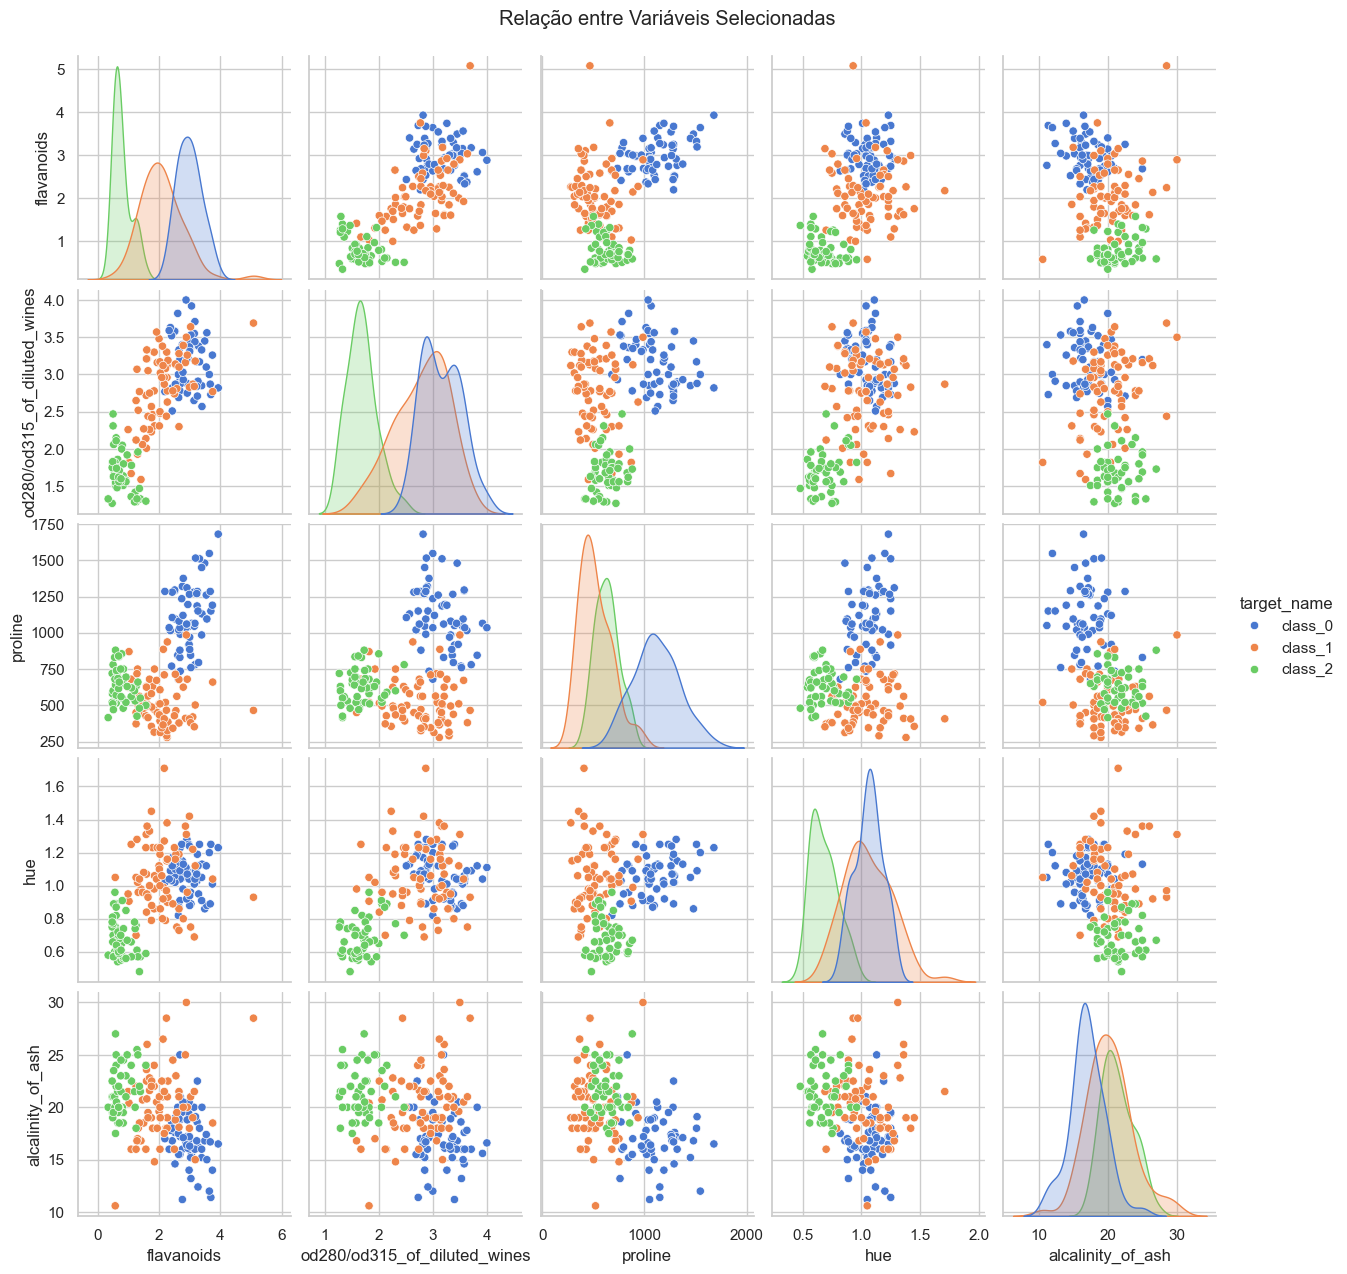


# Pairplot mostra boa separação entre classes com:
# - flavanoids, od280/od315 e proline → separam bem as 3 classes
# - hue ajuda a separar class_2
# - alcalinity_of_ash tem sobreposição, mas ajuda um pouco na class_1
# Essas features são úteis para classificação e visualização


In [ ]:
#Pairplot para algumas features

selected_features = [
    'flavanoids',
    'od280/od315_of_diluted_wines',
    'proline',
    'hue',
    'alcalinity_of_ash'
]

sns.pairplot(df_wine[selected_features + ['target_name']], hue='target_name')
plt.suptitle('Relação entre Variáveis Selecionadas', y=1.02)
plt.show()

conslusao = """
# Pairplot mostra boa separação entre classes com:
# - flavanoids, od280/od315 e proline - separam bem as 3 classes
# - hue ajuda a separar class_2
# - alcalinity_of_ash tem sobreposição, mas ajuda um pouco na class_1
# Essas features são úteis para classificação e visualização"""

print(conslusao)

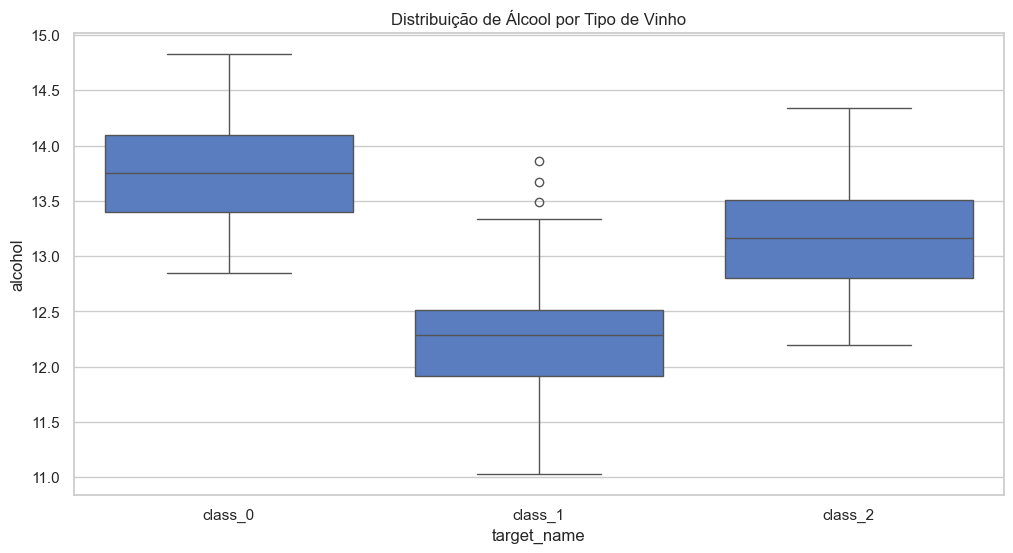


# Teor alcoólico ajuda a diferenciar as classes:
# - class_0 tem maior teor de álcool (mediana ~13.8)
# - class_1 tem o menor (~12.3) com outliers
# - class_2 é intermediária (~13.2)
#



In [31]:
#Boxplots 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_wine, x='target_name', y='alcohol')
plt.title('Distribuição de Álcool por Tipo de Vinho')
plt.show()

conslusao = """
# Teor alcoólico ajuda a diferenciar as classes:
# - class_0 tem maior teor de álcool (mediana ~13.8)
# - class_1 tem o menor (~12.3) com outliers
# - class_2 é intermediária (~13.2)
#
"""

print(conslusao)